In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [5]:
data=pd.read_csv('Online_Retail.csv')
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
150026,549319,22296,HEART IVORY TRELLIS LARGE,12,8/4/2011 10:09,1.65,16623.0,United Kingdom
267972,560368,20668,DISCO BALL CHRISTMAS DECORATION,24,18-07-2011 12:25,0.12,17841.0,United Kingdom
484282,577527,22271,FELTCRAFT DOLL ROSIE,3,20-11-2011 13:40,2.95,17523.0,United Kingdom
451493,575211,22111,SCOTTIE DOG HOT WATER BOTTLE,2,9/11/2011 10:39,4.95,17377.0,United Kingdom
149685,549298,22896,PEG BAG APPLES DESIGN,6,8/4/2011 8:20,2.55,13015.0,United Kingdom


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [12]:
data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
data_null = round(100*(data.isnull().sum())/len(data), 2)
data_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [15]:
data=data.dropna()
data.shape

(406829, 8)

In [18]:
data["CustomerID"][0:10]

0    17850.0
1    17850.0
2    17850.0
3    17850.0
4    17850.0
5    17850.0
6    17850.0
7    17850.0
8    17850.0
9    13047.0
Name: CustomerID, dtype: float64

In [19]:
data["CustomerID"]=data["CustomerID"].astype(str)

In [23]:
data['Amount'] = data['Quantity']*data['UnitPrice']
rfm_m = data.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [24]:
rfm_f = data.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [26]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')rfm.sample(5)

,CustomerID,Amount,Frequency
1252,14032.0,2929.84,152
3069,16495.0,684.41,97
468,12944.0,604.51,30
4253,18127.0,348.73,47
1276,14060.0,6135.38,203


In [38]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
max_date = max(data['InvoiceDate'])
data['Diff'] = max_date - data['InvoiceDate']
rfm_p = data.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.sample(5)

,CustomerID,Diff
595,13124.0,31 days 04:34:00
63,12425.0,78 days 23:48:00
3572,17190.0,0 days 05:46:00
2752,16072.0,289 days 02:47:00
3628,17272.0,43 days 00:42:00


In [45]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [54]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,326,326
1,12347.0,4310.00,40,40
2,12348.0,1797.24,76,76
3,12349.0,1757.55,19,19
4,12350.0,334.40,311,311


Text(0.5, 0, 'Attributes')

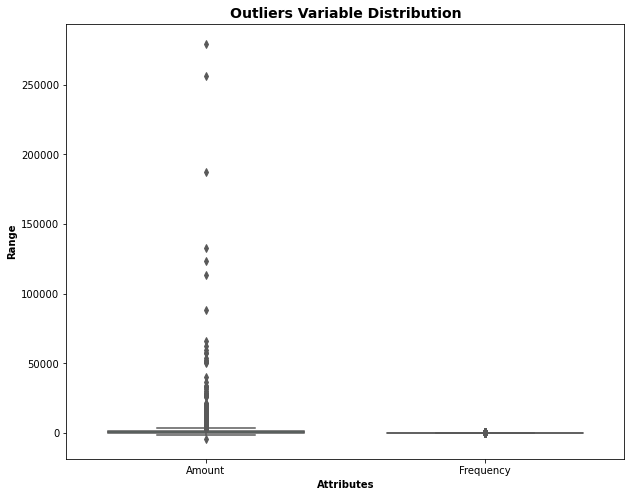

In [55]:
attributes = ['Amount','Frequency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [56]:
rfm_df = rfm[['Amount', 'Frequency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4372, 2)

In [57]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency']
rfm_df_scaled.head()

,Amount,Frequency
0,-0.231001,1.975600
1,0.293432,-0.535025
2,-0.012316,-0.219002
3,-0.017146,-0.719372
4,-0.190312,1.843924


In [63]:
#kmeans model 
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)
kmeans.labels_

array([0, 2, 2, ..., 2, 2, 2])

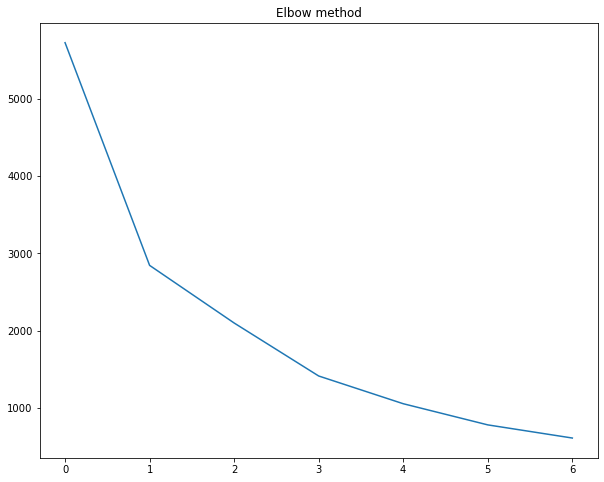

In [70]:
# elbow 
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.title("Elbow method")
plt.show()

In [72]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,326,326,7
1,12347.0,4310.00,40,40,5
2,12348.0,1797.24,76,76,5
3,12349.0,1757.55,19,19,5
4,12350.0,334.40,311,311,7


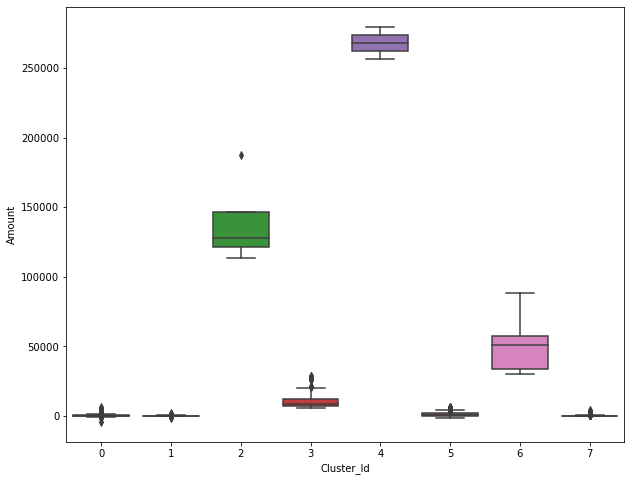

In [77]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)
plt.show()

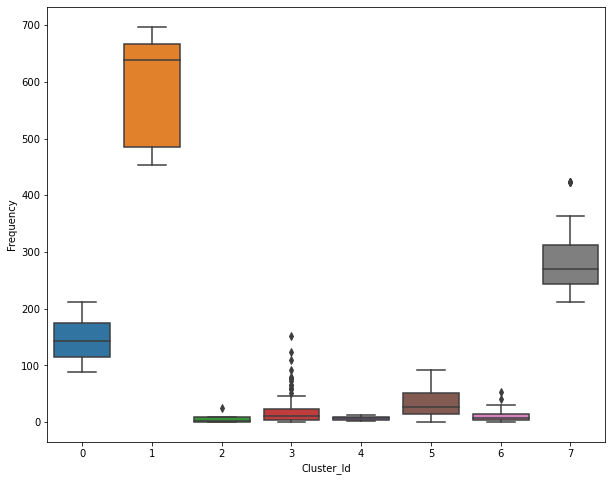

In [78]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)
plt.show()


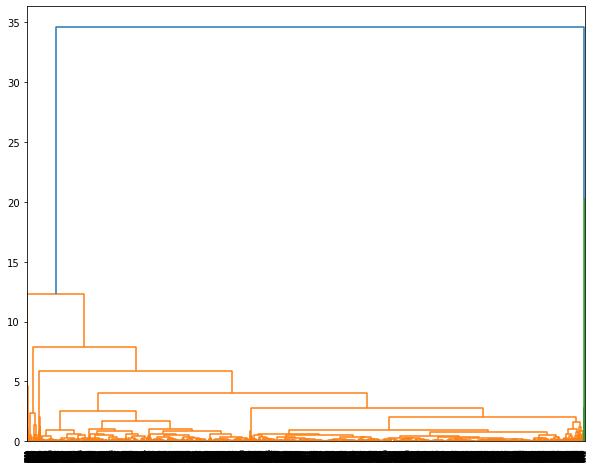

In [79]:
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()